<a href="https://colab.research.google.com/github/betheman/Deep-Learning/blob/master/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/LogisticRegression/stroke_data.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


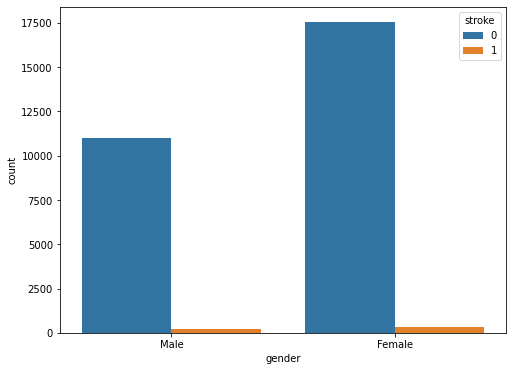

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['gender'],data=df,hue='stroke')

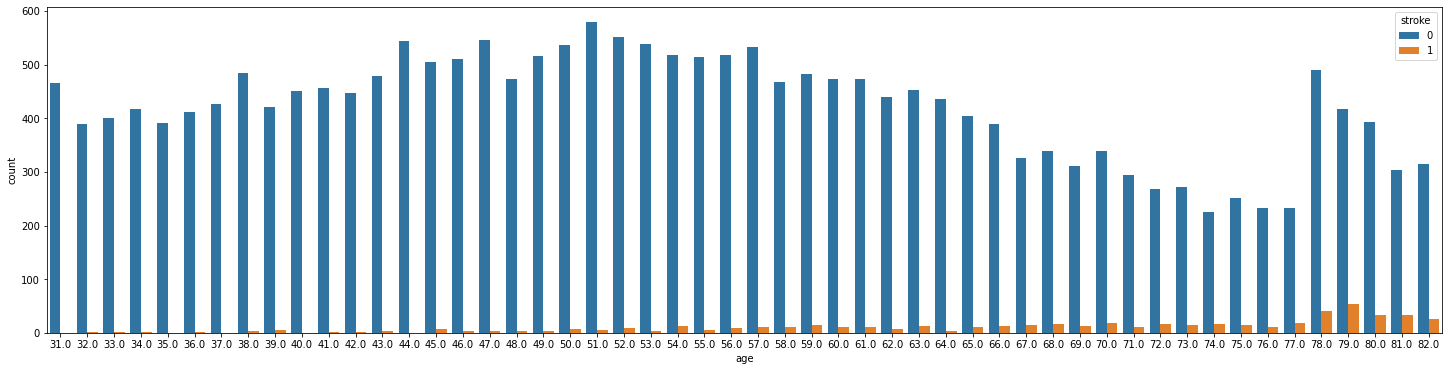

In [6]:
plt.figure(figsize=(25,6))
sns.countplot(x=df[df['age']>30]['age'],data=df,hue='stroke')

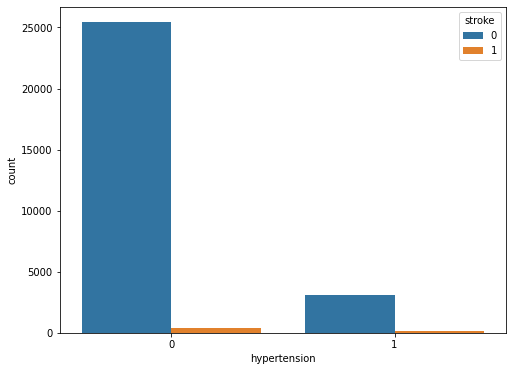

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['hypertension'],data=df,hue='stroke')

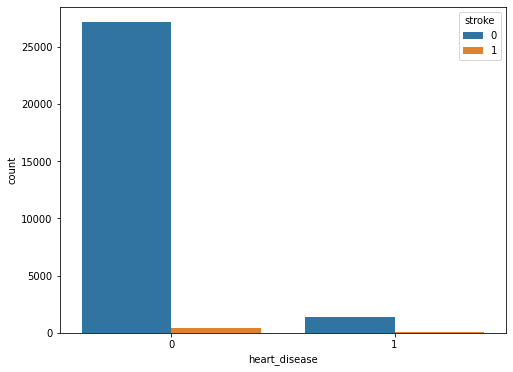

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['heart_disease'],data=df,hue='stroke')

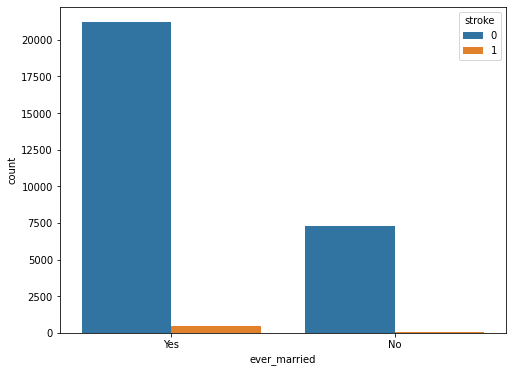

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['ever_married'],data=df,hue='stroke')

In [0]:
#df=pd.get_dummies(data=df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first==True)

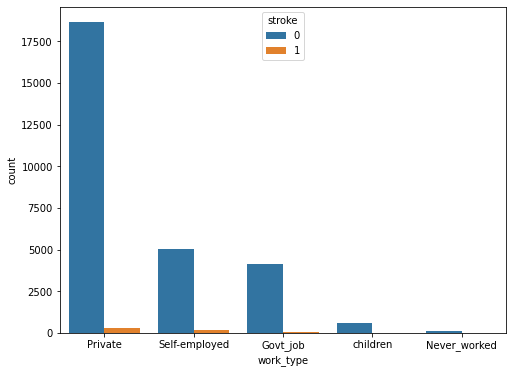

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['work_type'],data=df,hue='stroke')

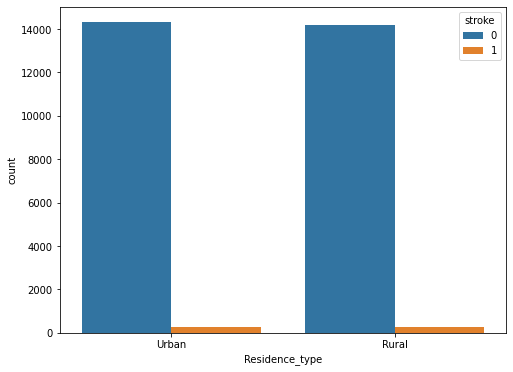

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Residence_type'],data=df,hue='stroke')

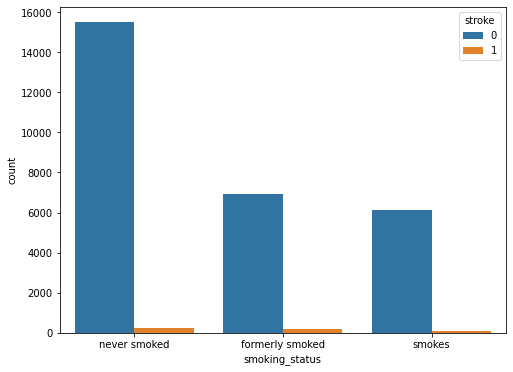

In [13]:
#smoking_status
plt.figure(figsize=(8,6))
sns.countplot(x=df['smoking_status'],data=df,hue='stroke')

In [0]:
df=pd.get_dummies(data=df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)

In [15]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,1,1,0,1,0,0,1,1,0
1,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
2,52.0,0,0,77.59,17.7,0,0,1,0,1,0,0,1,0,0
3,75.0,0,1,243.53,27.0,0,0,1,0,0,1,0,0,1,0
4,32.0,0,0,77.67,32.3,0,0,1,0,1,0,0,0,0,1


In [16]:
df.corr()['stroke']

age                            0.154059
hypertension                   0.078674
heart_disease                  0.105142
avg_glucose_level              0.075447
bmi                           -0.004039
stroke                         1.000000
gender_Male                    0.012257
ever_married_Yes               0.047724
work_type_Never_worked        -0.008186
work_type_Private             -0.024582
work_type_Self-employed        0.048088
work_type_children            -0.020381
Residence_type_Urban           0.001962
smoking_status_never smoked   -0.020755
smoking_status_smokes         -0.003321
Name: stroke, dtype: float64

In [0]:
df.drop(['bmi','Residence_type_Urban','smoking_status_smokes'],inplace=True,axis=1)

In [18]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked
0,58.0,1,0,87.96,0,1,1,0,1,0,0,1
1,70.0,0,0,69.04,0,0,1,0,1,0,0,0
2,52.0,0,0,77.59,0,0,1,0,1,0,0,0
3,75.0,0,1,243.53,0,0,1,0,0,1,0,1
4,32.0,0,0,77.67,0,0,1,0,1,0,0,0


In [0]:
y=df['stroke']
X=df.drop('stroke',axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
ss=MinMaxScaler().fit(X_train)

In [0]:
X_train=ss.transform(X_train)

In [0]:
X_test=ss.transform(X_test)

In [26]:
len(X_test)

9592

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
st_model=Sequential()
st_model.add(layer=Dense(units=32,activation='relu'))
st_model.add(layer=Dense(units=32,activation='relu'))
st_model.add(layer=Dense(units=1,activation='sigmoid'))
st_model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
st_model.fit(X_train,y_train,batch_size=256,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
77/77 [==============================] - 0s 4ms/step - loss: 0.3872 - val_loss: 0.1472
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 0.1207 - val_loss: 0.1040
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.1047 - val_loss: 0.0952
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0974 - val_loss: 0.0901
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0926 - val_loss: 0.0861
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0891 - val_loss: 0.0835
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0865 - val_loss: 0.0815
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0849 - val_loss: 0.0800
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0834 - val_loss: 0.0792
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.0821 - val_loss: 0.0794
Epoch 11/50
77/77 [

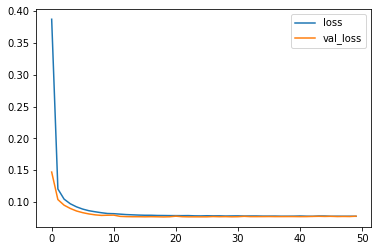

In [30]:
loss=pd.DataFrame(st_model.history.history)
loss.plot()

In [31]:
predictions=st_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
confusion_matrix(y_test,predictions)

array([[9421,    0],
       [ 171,    0]])

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9421
           1       0.00      0.00      0.00       171

    accuracy                           0.98      9592
   macro avg       0.49      0.50      0.50      9592
weighted avg       0.96      0.98      0.97      9592



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
